Customer Segmentation project on mall customer segmentation dataset using K-Means.
Primary objective is to uncover distinct customer groups based on their spending behavior.

1. Understanding the data
    - Import libraries
    - Briefly understand the dataset
    - Check for Null values
    - Prepare data for clustering

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/Users/dianeumurerwa/Downloads/Mall_Customers.csv")

In [5]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


For unsupervised learning we will be plotting our clusters of customers based on the factors of Annual Income column and Spending Score column, so here is a separate dataframe for those two columns using the index numbers to extract 

In [8]:
X = df.iloc[:, [3,4]].values

In [9]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

2. Perform the elbow method to find optimal NO. of clusters
    - Using K-Means to iterate from 1 to 11 clusters and plotting an elbow plot
    - Deciding optimal number of clusters to be used
    

In [10]:
from sklearn.cluster import KMeans
wcss =[]

Here i am using a loop to find the optimal value of K using elbow method

In [11]:
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

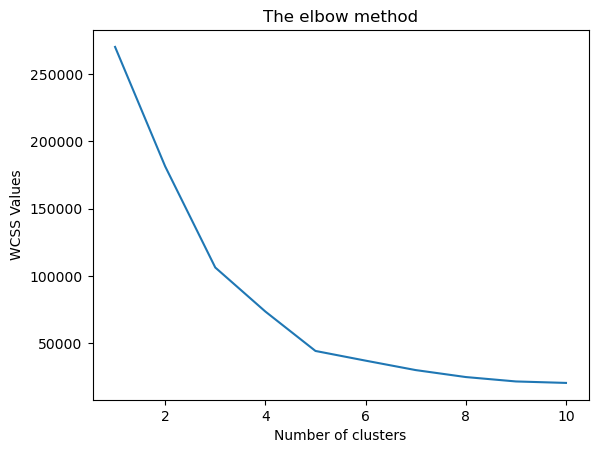

In [12]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS Values")
plt.show()

Optimal number of clusters is 5 

3. Training a model using unsupervised learning algorithm (K-Means)
    - initializing our K means Model with selected optimal No.Clusters
    - Plot of Clusters and gain intutions regarding our customers
     

In [19]:
kmeansmodel = KMeans(n_clusters = 5, init ='k-means++', random_state = 0)

In [20]:
y_kmeans = kmeansmodel.fit_predict(X)

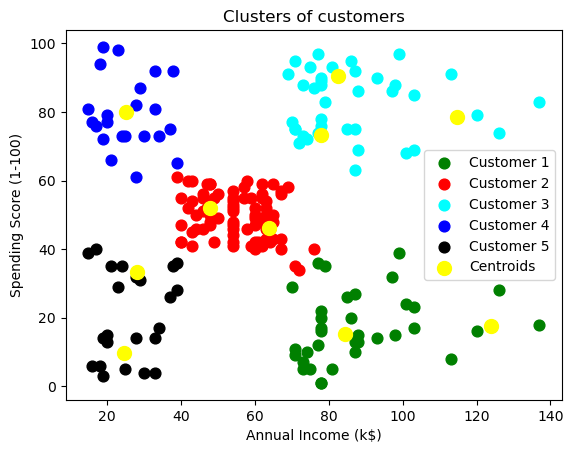

In [29]:
#plot all the 5 clusters of customers

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 60, c ="green", label = 'Customer 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 60, c ="red", label = 'Customer 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 60, c ="cyan", label = 'Customer 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 60, c ="blue", label = 'Customer 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 60, c ="black", label = 'Customer 5')

#plot centroids 

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
           



Insights and Recommendation  

- Low-Income, High Spending:

Customers in blue cluster exhibits a higher spending score despite having a lower income level.

- Mid-Range Salary with Average Spending:

Customers in red cluster have a mid-range salary and demonstrate well spending patterns.

- High-Income, Low Spending:

Surprisingly, the high-income segment in green cluster shows a lower spending score.

Strategic Implications:

Promoting products to customers in the mid-range salary cluster could yield favorable results. This group not only represents a significant portion of the customer base but also showcases well spending pattern, making them a promising target for marketing initiatives.
